# Análisis de Sentimiento en Reseñas de Electrónica de Amazon

## 1. Introducción

En este proyecto aplicaremos técnicas de procesamiento de lenguaje natural (NLP) para analizar el sentimiento de reseñas reales de productos electrónicos de Amazon. El objetivo es construir y comparar modelos de clasificación binaria capaces de identificar si una reseña es positiva o negativa, utilizando únicamente el texto y la calificación otorgada por el usuario.

Trabajaremos con un subconjunto de 5,000 reseñas seleccionadas aleatoriamente para optimizar recursos computacionales y garantizar reproducibilidad. Se eliminarán todas las columnas innecesarias, quedándonos solo con el texto de la reseña y la calificación (rating), la cual convertiremos a una variable binaria.

El flujo general será:
- Carga y exploración de los datos
- Preprocesamiento y limpieza de texto
- Análisis exploratorio y visualizaciones
- Representación vectorial de los textos
- Entrenamiento de modelos supervisados tradicionales
- Evaluación, interpretación y justificación de resultados

Este análisis simula un caso empresarial de clasificación de sentimiento aplicando únicamente técnicas tradicionales de NLP, sin modelos preentrenados tipo transformers.


In [4]:
!pip install -r requirements.txt
!pip install utils.py

In [5]:
import random
import numpy as np
import pandas as pd
from collections import Counter # Exploración
from nltk import ngrams # Exploración
from nltk.probability import FreqDist # Exploración


## 1. Carga y exploracion de datos

In [6]:
#importamos librerias necesarias
import pandas as pd

#Cargo Dataset

df= pd.read_csv('DatafinitiElectronicsProductData.csv')

In [7]:
#hagp un pequeña prebisualizaicion de los datos
df.head()


id       asins      brand  \
0  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
1  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
2  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
3  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
4  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   

                                          categories colors  \
0  Electronics,Computers,Computer Accessories,Key...  Black   
1  Electronics,Computers,Computer Accessories,Key...  Black   
2  Electronics,Computers,Computer Accessories,Key...  Black   
3  Electronics,Computers,Computer Accessories,Key...  Black   
4  Electronics,Computers,Computer Accessories,Key...  Black   

              dateAdded           dateUpdated                   dimension  \
0  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x 8.5 in x 0.19 in   
1  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x 8.5 in x 0.19 in   
2  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x 8.5 in x 0.19 in   
3  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x 8.5 in x 0.19 in   
4  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x 8.5 in x 0.19 in   

            ean                                          imageURLs  ...  \
0  8.900000e+11  https://i5.walmartimages.com/asr/2a41f6f0-844e...  ...   
1  8.900000e+11  https://i5.walmartimages.com/asr/2a41f6f0-844e...  ...   
2  8.900000e+11  https://i5.walmartimages.com/asr/2a41f6f0-844e...  ...   
3  8.900000e+11  https://i5.walmartimages.com/asr/2a41f6f0-844e...  ...   
4  8.900000e+11  https://i5.walmartimages.com/asr/2a41f6f0-844e...  ...   

  reviews.doRecommend reviews.numHelpful reviews.rating  \
0                True                0.0            5.0   
1                True                0.0            4.0   
2                True                0.0            4.0   
3                True                0.0            5.0   
4                True                0.0            5.0   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/4562009/review...   
1  http://reviews.bestbuy.com/3545/4562009/review...   
2  http://reviews.bestbuy.com/3545/4562009/review...   
3  http://reviews.bestbuy.com/3545/4562009/review...   
4  http://reviews.bestbuy.com/3545/4562009/review...   

                                        reviews.text  \
0  This keyboard is very easy to type on, but the...   
1  It's thin and light. I can type pretty easily ...   
2  I love the new design the keys are spaced well...   
3  Attached easily and firmly. Has a nice feel. A...   
4  Our original keyboard was okay, but did not ha...   

                 reviews.title reviews.username  \
0  Love the fingerprint reader             JNH1   
1                         Nice             Appa   
2                          New             Kman   
3                Nice keyboard        UpstateNY   
4             Nice improvement        Glickster   

                                          sourceURLs           upc      weight  
0  https://www.walmart.com/ip/Microsoft-Surface-P...  8.900000e+11  1.1 pounds  
1  https://www.walmart.com/ip/Microsoft-Surface-P...  8.900000e+11  1.1 pounds  
2  https://www.walmart.com/ip/Microsoft-Surface-P...  8.900000e+11  1.1 pounds  
3  https://www.walmart.com/ip/Microsoft-Surface-P...  8.900000e+11  1.1 pounds  
4  https://www.walmart.com/ip/Microsoft-Surface-P...  8.900000e+11  1.1 pounds  

[5 rows x 27 columns]

In [8]:
df.shape

(7299, 27)

In [9]:
df = df[['reviews.text','reviews.rating']].copy()
df

reviews.text  reviews.rating
0     This keyboard is very easy to type on, but the...             5.0
1     It's thin and light. I can type pretty easily ...             4.0
2     I love the new design the keys are spaced well...             4.0
3     Attached easily and firmly. Has a nice feel. A...             5.0
4     Our original keyboard was okay, but did not ha...             5.0
...                                                 ...             ...
7294  This remote was a decent replacement for my lo...             4.0
7295  This looks good on my celling. Flushes very we...             4.0
7296  Great Plate for projector mount, very easy to ...             4.0
7297  This mount worked very well for me when I used...             5.0
7298  It's a nice solid mounting plate check and mak...             4.0

[7299 rows x 2 columns]

In [10]:
#eliminamos las columnas que tengas algun na
df = df.dropna(subset= ['reviews.text','reviews.rating'])
df.shape

(7130, 2)

In [11]:
#Convierto el rating a entero para mas seguridad
df['reviews.rating']= df['reviews.rating'].astype(int)

/tmp/ipython-input-11-3107701673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews.rating']= df['reviews.rating'].astype(int)


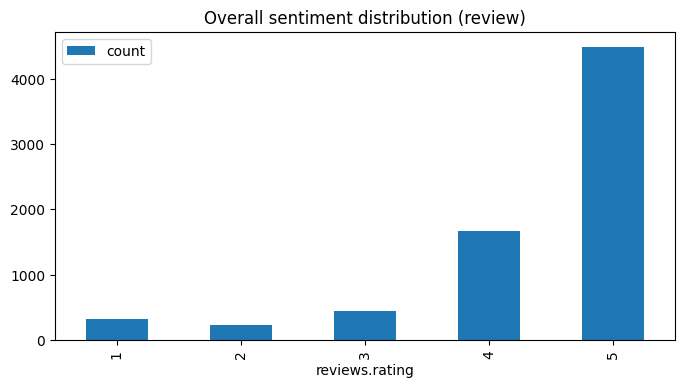

In [12]:
aux_df = pd.DataFrame(df['reviews.rating'].value_counts(sort=False).sort_index())
aux_df = aux_df.plot(kind='bar', title='Overall sentiment distribution (review)', figsize=(8, 4))

Se ve que hay un desbalanceo de las clases ya que hay muchas mas positivas que negativas

In [13]:
print(df.head())
print(df['reviews.rating'].value_counts().sort_values())

                                        reviews.text  reviews.rating
0  This keyboard is very easy to type on, but the...               5
1  It's thin and light. I can type pretty easily ...               4
2  I love the new design the keys are spaced well...               4
3  Attached easily and firmly. Has a nice feel. A...               5
4  Our original keyboard was okay, but did not ha...               5
reviews.rating
2     222
1     318
3     440
4    1660
5    4490
Name: count, dtype: int64


##2. Etapa de preprocesado de texto

In [14]:
#Voy a definir una funcion que clasifique el sentimiento para una clasificacion binaria, siendo el cero negativo y 1 positivo

def rating_to_sentiment(rating):
  """
  Tranforma una clasificacion de de 5 niveles en 2 positivo o negativo
  """
  if rating >=4:
    return 1
  else:
    return 0

In [15]:
import spacy

# Cargar modelo de spaCy en inglés
nlp = spacy.load('en_core_web_sm')

#Creo una funcino de limpieza. Para las stopwords usare Spacy
def clean_text_spacy(text):
    """
    Preprocesa texto con spaCy:
    - Minúsculas
    - Tokenización, lematización
    - Quitar signos, stopwords y palabras muy cortas
    """
    doc = nlp(str(text).lower())
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and
           not token.is_punct and
           not token.like_url and
           not token.is_space and
           token.is_alpha and
           len(token) > 2
    ]
    return ' '.join(tokens)

In [16]:
#Creo una nueva columna de sentimiento
df['sentiment'] = df['reviews.rating'].apply(rating_to_sentiment)

/tmp/ipython-input-16-3251536199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['reviews.rating'].apply(rating_to_sentiment)


In [17]:
#Comprobamos
print(df.head())
print(df['sentiment'].value_counts())

                                        reviews.text  reviews.rating  \
0  This keyboard is very easy to type on, but the...               5   
1  It's thin and light. I can type pretty easily ...               4   
2  I love the new design the keys are spaced well...               4   
3  Attached easily and firmly. Has a nice feel. A...               5   
4  Our original keyboard was okay, but did not ha...               5   

   sentiment  
0          1  
1          1  
2          1  
3          1  
4          1  
sentiment
1    6150
0     980
Name: count, dtype: int64


In [18]:
aux_df2 = df['sentiment'].value_counts(sort=False).sort_index()
aux_df2 = aux_df2.plot(kind='bar', title='Sentiment distribution (Corpus Final)', figsize=(8, 4))

In [19]:
# Aplicar la función a la columna de reseñas
df['clean_review'] = df['reviews.text'].apply(clean_text_spacy)

# Mostrar ejemplo de resultados
print(df[['reviews.text', 'clean_review']].head(3))

                                        reviews.text  \
0  This keyboard is very easy to type on, but the...   
1  It's thin and light. I can type pretty easily ...   
2  I love the new design the keys are spaced well...   

                                        clean_review  
0  keyboard easy type fingerprint reader good fea...  
1                      thin light type pretty easily  
2  love new design key space mis type finger prin...  


/tmp/ipython-input-19-3472487595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_review'] = df['reviews.text'].apply(clean_text_spacy)


In [20]:
df.head()


reviews.text  reviews.rating  \
0  This keyboard is very easy to type on, but the...               5   
1  It's thin and light. I can type pretty easily ...               4   
2  I love the new design the keys are spaced well...               4   
3  Attached easily and firmly. Has a nice feel. A...               5   
4  Our original keyboard was okay, but did not ha...               5   

   sentiment                                       clean_review  
0          1  keyboard easy type fingerprint reader good fea...  
1          1                      thin light type pretty easily  
2          1  love new design key space mis type finger prin...  
3          1         attach easily firmly nice feel surface pro  
4          1  original keyboard okay laptop feel bit floppy ...

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
#Funcion para ver los n gramas mas frecuentes

def get_top_ngrams(corpus, ngram_range=(1,1), top_n=10):
    """
    Recibe un texto, los ngramas y el numero de ngramas que queremos ver
    Devuelve los N-grams más frecuentes en el corpus de texto.

    """
    vec = CountVectorizer(ngram_range=ngram_range)
    X = vec.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_n]

In [23]:
# Top 10 palabras
top_uni = get_top_ngrams(df['clean_review'], ngram_range=(1,1), top_n=10)
print("Top 10 unigramas:", top_uni)

# Top 10 bigramas
top_bi = get_top_ngrams(df['clean_review'], ngram_range=(2,2), top_n=10)
print("Top 10 bigramas:", top_bi)

# Top 10 trigramas
top_tri = get_top_ngrams(df['clean_review'], ngram_range=(3,3), top_n=10)
print("Top 10 trigramas:", top_tri)

Top 10 unigramas: [('great', 2821), ('remote', 2599), ('sound', 2558), ('speaker', 2195), ('work', 2175), ('good', 2046), ('use', 1694), ('easy', 1629), ('buy', 1321), ('like', 1239)]
Top 10 bigramas: [('work great', 416), ('touch screen', 334), ('sound quality', 312), ('easy use', 308), ('sound great', 300), ('great sound', 289), ('good buy', 217), ('battery life', 217), ('easy set', 211), ('harmony remote', 210)]
Top 10 trigramas: [('speaker sound great', 32), ('sound quality good', 30), ('great sound quality', 28), ('old harmony remote', 28), ('speaker great sound', 25), ('great battery life', 24), ('remote easy set', 24), ('work like charm', 23), ('good sound quality', 23), ('jbl ever elite', 23)]


In [24]:
import matplotlib.pyplot as plt
#Funcion para pintar los n gramas mas frecuentes
def plot_ngrams(ngrams, title):
    words = [w for w, c in ngrams]
    counts = [c for w, c in ngrams]
    plt.figure(figsize=(8,4))
    plt.barh(words[::-1], counts[::-1], color='steelblue')
    plt.title(title)
    plt.xlabel('Frecuencia')
    plt.tight_layout()
    plt.show()

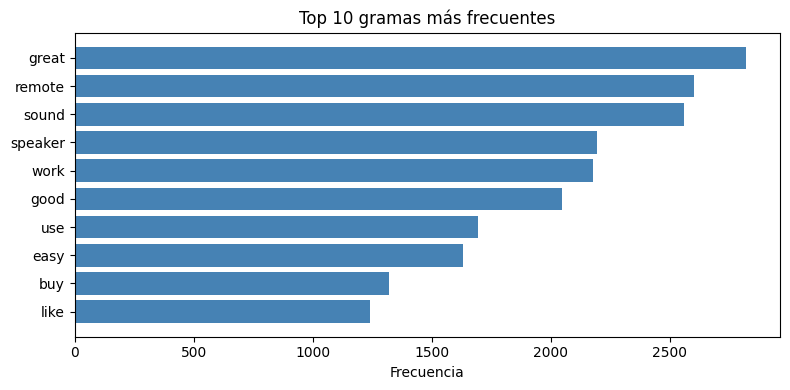

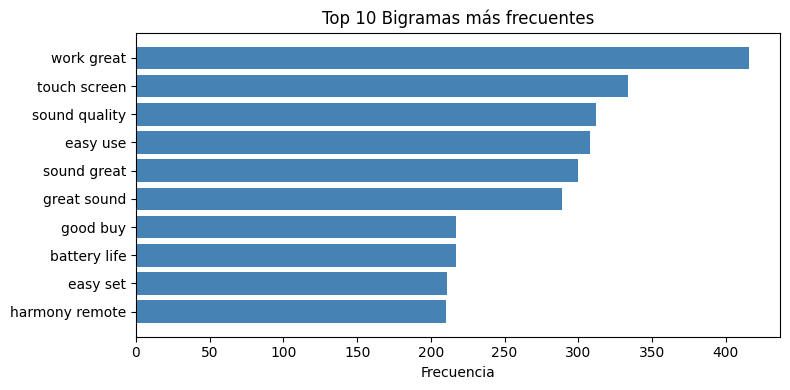

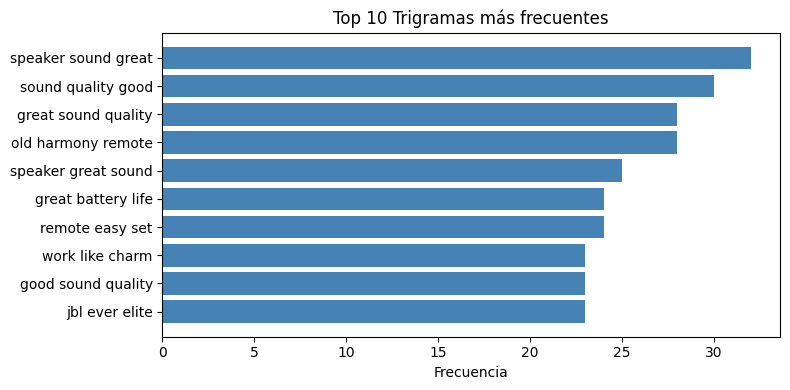

In [25]:
# Visualizar bigramas
plot_ngrams(top_uni, 'Top 10 gramas más frecuentes')
plot_ngrams(top_bi, 'Top 10 Bigramas más frecuentes')
plot_ngrams(top_tri, 'Top 10 Trigramas más frecuentes')

Top 10 unigramas: [('great', 2628), ('sound', 2251), ('speaker', 1959), ('good', 1778), ('remote', 1728), ('work', 1711), ('easy', 1512), ('use', 1348), ('buy', 1053), ('like', 976)]
Top 10 bigramas: [('work great', 398), ('easy use', 292), ('great sound', 280), ('sound great', 278), ('sound quality', 276), ('easy set', 196), ('touch screen', 189), ('good buy', 179), ('surface pro', 175), ('battery life', 172)]
Top 10 trigramas: [('speaker sound great', 31), ('great sound quality', 27), ('speaker great sound', 24), ('sound quality good', 23), ('remote easy set', 23), ('work like charm', 22), ('sound quality great', 21), ('great battery life', 21), ('good sound quality', 20), ('remote easy use', 19)]


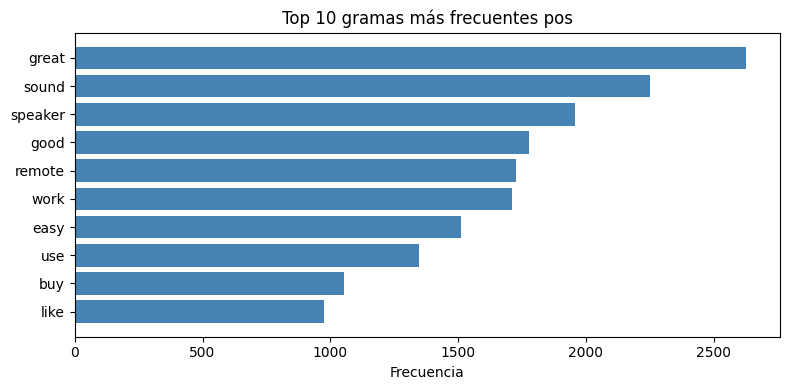

In [26]:
#Voy visulaizar lo mismo pero segun el sentimiento

# Top 10 palabras
top_uni_pos = get_top_ngrams(df[df['sentiment']==1]['clean_review'], ngram_range=(1,1), top_n=10)
print("Top 10 unigramas:", top_uni_pos)

# Top 10 bigramas
top_bi_pos = get_top_ngrams(df[df['sentiment']==1]['clean_review'], ngram_range=(2,2), top_n=10)
print("Top 10 bigramas:", top_bi_pos)

# Top 10 trigramas
top_tri_pos = get_top_ngrams(df[df['sentiment']==1]['clean_review'], ngram_range=(3,3), top_n=10)
print("Top 10 trigramas:", top_tri_pos)

plot_ngrams(top_uni_pos, 'Top 10 gramas más frecuentes pos')
plot_ngrams(top_bi_pos, 'Top 10 Bigramas más frecuentes pos')
plot_ngrams(top_tri, 'Top 10 Trigramas más frecuentes pos')



In [27]:
# Top 10 palabras
top_uni_neg = get_top_ngrams(df[df['sentiment']==0]['clean_review'], ngram_range=(1,1), top_n=10)
print("Top 10 unigramas:", top_uni)

# Top 10 bigramas
top_bi_neg = get_top_ngrams(df[df['sentiment']==0]['clean_review'], ngram_range=(2,2), top_n=10)
print("Top 10 bigramas:", top_bi)

# Top 10 trigramas
top_tri_neg = get_top_ngrams(df[df['sentiment']==0]['clean_review'], ngram_range=(3,3), top_n=10)
print("Top 10 trigramas:", top_tri)

plot_ngrams(top_uni_neg, 'Top 10 gramas más frecuentes neg')
plot_ngrams(top_bi_neg, 'Top 10 Bigramas más frecuentes neg')
plot_ngrams(top_tri, 'Top 10 Trigramas más frecuentes neg')

Top 10 unigramas: [('great', 2821), ('remote', 2599), ('sound', 2558), ('speaker', 2195), ('work', 2175), ('good', 2046), ('use', 1694), ('easy', 1629), ('buy', 1321), ('like', 1239)]
Top 10 bigramas: [('work great', 416), ('touch screen', 334), ('sound quality', 312), ('easy use', 308), ('sound great', 300), ('great sound', 289), ('good buy', 217), ('battery life', 217), ('easy set', 211), ('harmony remote', 210)]
Top 10 trigramas: [('speaker sound great', 32), ('sound quality good', 30), ('great sound quality', 28), ('old harmony remote', 28), ('speaker great sound', 25), ('great battery life', 24), ('remote easy set', 24), ('work like charm', 23), ('good sound quality', 23), ('jbl ever elite', 23)]


In [28]:
pip install wordcloud


In [29]:
#Biblioteca para nube de palabras y representacion
from wordcloud import WordCloud
import matplotlib.pyplot as plt

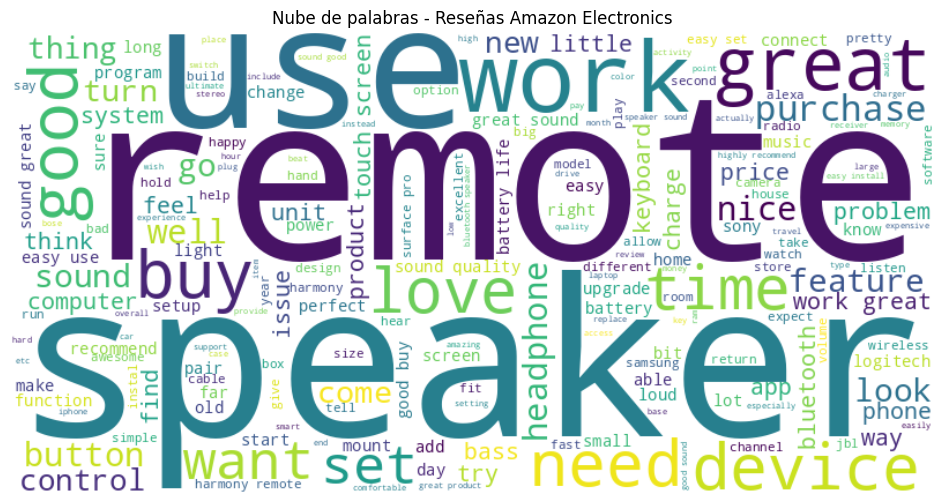

In [30]:
#nube de palabras en general
text = ' '.join(df['clean_review'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - Reseñas Amazon Electronics')
plt.show()

In [ ]:
#nube de palabras con sentimiento positivo
text_pos = ' '.join(df[df['sentiment']==1]['clean_review'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(text_pos)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - Reseñas Positivas')
plt.show()

In [32]:
#nube de palabras con sentimiento positivo
text_pos = ' '.join(df[df['sentiment']==1]['clean_review'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(text_pos)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - Reseñas Positivas')
plt.show()

In [ ]:
# Top 30 palabras por clase (puedes cambiar el número según tu corpus)
top_n = 30
uni_pos = get_top_ngrams(df[df['sentiment']==1]['clean_review'], ngram_range=(1,1), top_n=top_n)
uni_neg = get_top_ngrams(df[df['sentiment']==0]['clean_review'], ngram_range=(1,1), top_n=top_n)

# Extraer solo las palabras (sin frecuencia)
words_pos = set([w for w, _ in uni_pos])
words_neg = set([w for w, _ in uni_neg])

# Palabras comunes
common_words = words_pos.intersection(words_neg)
print("Palabras comunes más frecuentes:", common_words)


In [ ]:
pip install gensim


In [ ]:
from gensim.models import Word2Vec

# Tokenizar el corpus limpio en listas de palabras
# Cada reseña será una lista de tokens
tokenized_reviews = [review.split() for review in df['clean_review']]

# Entrenar el modelo Word2Vec (dimensión 100, puedes ajustar)
w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=3, workers=4, seed=42)


In [ ]:
tokenized_reviews[0]

In [ ]:
df['clean_review'][0]

In [ ]:
palabras_clave = ["good", "device", "price", "battery", "computer"]

for palabra in palabras_clave:
    if palabra in w2v_model.wv:
        similares = w2v_model.wv.most_similar(palabra, topn=10)
        print(f"\nPalabras más similares a '{palabra}':")
        for similar, score in similares:
            print(f"  {similar:12} ({score:.2f})")
    else:
        print(f"\nLa palabra '{palabra}' no está en el vocabulario del modelo.")

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

def plot_word2vec_neighbors(w2v_model, palabras_clave, n_vecinos=10):
    palabras_plot = []
    vectores = []
    colores = []

    for palabra in palabras_clave:
        if palabra in w2v_model.wv:
            palabras_plot.append(palabra)
            vectores.append(w2v_model.wv[palabra])
            colores.append('red')
            # Añade los vecinos
            vecinos = w2v_model.wv.most_similar(palabra, topn=n_vecinos)
            for vecino, _ in vecinos:
                if vecino not in palabras_plot:
                    palabras_plot.append(vecino)
                    vectores.append(w2v_model.wv[vecino])
                    colores.append('blue')

    # Reducción de dimensionalidad a 2D
    tsne = TSNE(n_components=2, random_state=42, perplexity=15)
    emb_2d = tsne.fit_transform(np.array(vectores))

    plt.figure(figsize=(12,8))
    for i, palabra in enumerate(palabras_plot):
        plt.scatter(emb_2d[i,0], emb_2d[i,1], color=colores[i])
        plt.text(emb_2d[i,0]+0.3, emb_2d[i,1], palabra, fontsize=12)
    plt.title("Visualización 2D de embeddings Word2Vec\nPalabras clave y sus vecinos")
    plt.axis('off')
    plt.show()

plot_word2vec_neighbors(w2v_model, palabras_clave, n_vecinos=10)

## 5. Conclusiones del Análisis Exploratorio

El análisis exploratorio del corpus de reseñas de productos electrónicos de Amazon ha revelado varios aspectos fundamentales para el modelado de sentimiento:

- **Desbalance de clases:** La gran mayoría de las reseñas son positivas, lo que refleja la tendencia habitual en portales de comercio electrónico. Este desbalance impone la necesidad de emplear métricas apropiadas (precision, recall, F1-score por clase) y posiblemente ajustar los pesos en los modelos supervisados.

- **Patrones léxicos:** El análisis de N-grams muestra que existen frases y palabras recurrentes que capturan tanto elogios (“easy use”, “battery life”, “sound quality”) como quejas (“stop work”, “waste money”, “not work”). Muchas palabras altamente frecuentes son comunes a ambos sentimientos y pueden ser consideradas como stopwords de dominio para mejorar la discriminación en modelos.

- **Visualización con wordclouds:** Las nubes de palabras refuerzan que ciertos términos técnicos y adjetivos como “great”, “easy”, “battery”, “quality”, “work” predominan en el lenguaje de los usuarios. Al excluir palabras comunes, surgen diferencias léxicas más informativas entre reseñas positivas y negativas.

- **Relaciones semánticas con Word2Vec:** El embedding Word2Vec entrenado sobre el corpus permite identificar asociaciones semánticas y sinónimos no evidentes solo a partir de frecuencia. Palabras como “good”, “price”, “battery” tienen vecinos semánticos coherentes con el dominio, lo que puede enriquecer futuros modelos si se emplean embeddings.

- **Otras métricas:** La longitud de las reseñas y la diversidad de vocabulario también presentan diferencias leves por clase, pero no son tan determinantes como los patrones de N-grams o las relaciones captadas por embeddings.

**En síntesis,** el corpus contiene señales claras y diferenciables en el plano léxico y semántico, pese a la predominancia de sentimiento positivo. El análisis exploratorio permite seleccionar features relevantes, construir stopwords personalizadas y justificar el diseño de modelos supervisados robustos para la siguiente etapa.



## 2. Etapa de preprocesado de texto

##Entrenamiento

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Unimos stopwords de sklearn y palabras comunes del dominio
custom_stopwords = list(ENGLISH_STOP_WORDS.union(common_words))


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag-of-Words (BoW)
vectorizer_bow = CountVectorizer(stop_words=custom_stopwords, max_features=5000)
X_bow = vectorizer_bow.fit_transform(df['clean_review'])

# TF-IDF
vectorizer_tfidf = TfidfVectorizer(stop_words=custom_stopwords, max_features=5000)
X_tfidf = vectorizer_tfidf.fit_transform(df['clean_review'])

# Variable objetivo
y = df['sentiment']


In [ ]:
#Hago la division para el entrenamiento
from sklearn.model_selection import train_test_split

X_bow_train, X_bow_test, y_train, y_test = train_test_split(
    X_bow, y, test_size=0.2, random_state=42, stratify=y
)
X_tfidf_train, X_tfidf_test, _, _ = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)


### 6.1 Representación vectorial: Bag-of-Words y TF-IDF

Transformamos el texto limpio en matrices de características utilizando dos enfoques clásicos:

- **Bag-of-Words (CountVectorizer):** cuenta la frecuencia de cada palabra en cada reseña.
- **TF-IDF (TfidfVectorizer):** pondera la frecuencia de cada palabra en función de su rareza en el corpus.

En ambos casos, eliminamos las stopwords estándar del inglés y las palabras comunes a ambos sentimientos, para centrarnos en términos discriminativos.

Dividimos los datos en conjuntos de entrenamiento y prueba de forma estratificada, asegurando que la proporción de clases se mantenga en ambos subconjuntos.


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Entrenamiento BoW
nb_bow = MultinomialNB()
nb_bow.fit(X_bow_train, y_train)

# Entrenamiento TF-IDF
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_tfidf_train, y_train)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Entrenamiento BoW
lr_bow = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_bow.fit(X_bow_train, y_train)

# Entrenamiento TF-IDF
lr_tfidf = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_tfidf.fit(X_tfidf_train, y_train)


In [ ]:
# Predicciones
y_pred_nb_bow = nb_bow.predict(X_bow_test)
y_pred_nb_tfidf = nb_tfidf.predict(X_tfidf_test)

y_pred_lr_bow = lr_bow.predict(X_bow_test)
y_pred_lr_tfidf = lr_tfidf.predict(X_tfidf_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluar_modelo(y_test, y_pred, nombre_modelo):
    print(f"=== {nombre_modelo} ===")
    print(classification_report(y_test, y_pred, target_names=["Negativo", "Positivo"]))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negativo", "Positivo"])
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de confusión - {nombre_modelo}")
    plt.show()

# Evaluaciones
evaluar_modelo(y_test, y_pred_nb_bow, "Naive Bayes (BoW)")
evaluar_modelo(y_test, y_pred_nb_tfidf, "Naive Bayes (TF-IDF)")
evaluar_modelo(y_test, y_pred_lr_bow, "Logistic Regression (BoW)")
evaluar_modelo(y_test, y_pred_lr_tfidf, "Logistic Regression (TF-IDF)")


“Entre los modelos comparados, la Regresión Logística sobre la representación TF-IDF logra el mayor recall para la clase ‘Negativo’ (0.72), lo que resulta especialmente relevante en el contexto del análisis de satisfacción, ya que permite identificar la mayoría de las quejas. Aunque la precisión para esta clase es baja (0.47), la capacidad de detectar el mayor número posible de insatisfacciones puede ser prioritaria según los objetivos de negocio. Por tanto, se selecciona este modelo como el más adecuado, sin descartar posibles mejoras mediante técnicas de balanceo o ajuste de parámetros.”

In [ ]:
df_nn = df.copy()
df_nn

#### 1. Preparación de datos para redes neuronales

Convertimos el texto preprocesado a secuencias numéricas, tokenizando las palabras y aplicando padding para que todas las reseñas tengan la misma longitud.  
Esto permite alimentar la red neuronal con vectores de tamaño fijo, y entrenar una capa de embedding de forma conjunta con el modelo.

Dividimos los datos en entrenamiento y test de forma estratificada, manteniendo la proporción de clases.


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


In [ ]:
# Parámetros
max_vocab_size = 5000      # Vocabulario máximo
max_seq_len = 100          # Longitud máxima de secuencia (ajustable)

# 1. Tokenización
tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df_nn['clean_review'])

# 2. Texto a secuencias numéricas
sequences = tokenizer.texts_to_sequences(df_nn['clean_review'])

# 3. Padding para igualar longitud
X_seq = pad_sequences(sequences, maxlen=max_seq_len, padding='post', truncating='post')

# 4. Variable objetivo
y_seq = df_nn['sentiment'].values


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=42, stratify=y_seq
)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout

# Parámetros
embedding_dim = 50

model_mlp = Sequential([
    Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_seq_len),
    GlobalAveragePooling1D(),  # Promedia embeddings para cada secuencia
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binaria
])

model_mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_mlp.summary()


In [ ]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential([
    Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_seq_len),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Entrena ambos modelos de manera similar
epochs = 8
batch_size = 64

# Entrenamiento MLP
history_mlp = model_mlp.fit(
    X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size,
    callbacks=[EarlyStopping(patience=2, restore_best_weights=True)], verbose=2
)

# Entrenamiento LSTM
history_lstm = model_lstm.fit(
    X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size,
    callbacks=[EarlyStopping(patience=2, restore_best_weights=True)], verbose=2
)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predicción
y_pred_mlp = (model_mlp.predict(X_test) > 0.5).astype("int32")
y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype("int32")

print("=== MLP ===")
print(classification_report(y_test, y_pred_mlp, target_names=["Negativo", "Positivo"]))
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
ConfusionMatrixDisplay(cm_mlp, display_labels=["Negativo", "Positivo"]).plot(cmap='Blues')
plt.title("Matriz de confusión - MLP")
plt.show()

print("=== LSTM ===")
print(classification_report(y_test, y_pred_lstm, target_names=["Negativo", "Positivo"]))
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
ConfusionMatrixDisplay(cm_lstm, display_labels=["Negativo", "Positivo"]).plot(cmap='Blues')
plt.title("Matriz de confusión - LSTM")
plt.show()


“Tanto el MLP como la LSTM obtienen altas métricas para la clase positiva pero fallan drásticamente en detectar la clase negativa, como revela el recall menor al 16% y 5% respectivamente. Esto los convierte en modelos poco útiles para tareas en las que detectar insatisfacciones es prioritario. Este comportamiento evidencia la importancia de tratar el desbalance de clases (por ejemplo, con técnicas de oversampling o ponderación de la pérdida), y que en contextos de NLP clásico, los modelos tradicionales con ingeniería de features y técnicas de balanceo pueden superar a las redes neuronales simples, especialmente cuando los datos negativos son pocos o poco representativos.”

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Cálculo de pesos para las clases
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)
# Ejemplo de salida: {0: 3.12, 1: 0.52}


In [ ]:
history_mlp = model_mlp.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[EarlyStopping(patience=2, restore_best_weights=True)],
    verbose=2,
    class_weight=class_weight_dict
)


In [ ]:
history_lstm = model_lstm.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[EarlyStopping(patience=2, restore_best_weights=True)],
    verbose=2,
    class_weight=class_weight_dict
)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


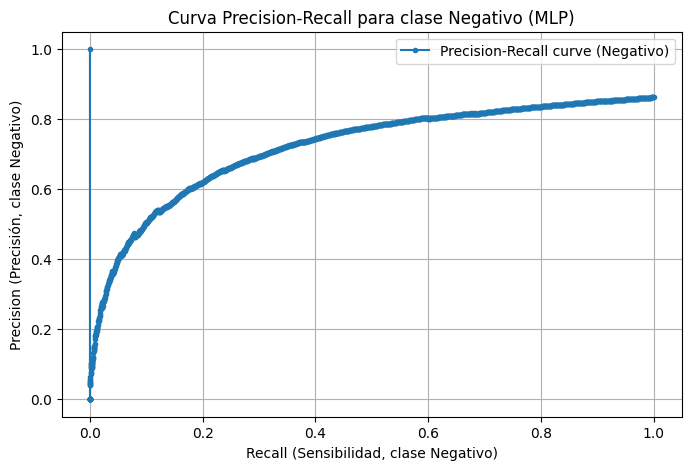

Average precision (clase Negativo): 0.721
Umbral | Precision Negativo | Recall Negativo
0.10   |    0.828           |   0.746
0.20   |    0.764           |   0.447
0.30   |    0.660           |   0.248
0.40   |    0.546           |   0.131
0.50   |    0.442           |   0.068
0.60   |    0.361           |   0.039
0.70   |    0.274           |   0.021
0.80   |    0.183           |   0.011
0.90   |    0.105           |   0.003


In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score

# Probabilidades predichas por el modelo MLP
y_prob_mlp = model_mlp.predict(X_test)

# Probabilidad de clase NEGATIVA (0): 1 - probabilidad de positiva (1)
y_prob_neg = 1 - y_prob_mlp.ravel()

# Curva Precision-Recall para la clase Negativo
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_neg, pos_label=1)

plt.figure(figsize=(8,5))
plt.plot(recall, precision, marker='.', label='Precision-Recall curve (Negativo)')
plt.xlabel('Recall (Sensibilidad, clase Negativo)')
plt.ylabel('Precision (Precisión, clase Negativo)')
plt.title('Curva Precision-Recall para clase Negativo (MLP)')
plt.grid(True)
plt.legend()
plt.show()

# (Opcional) Área bajo la curva PR
ap_score = average_precision_score(y_test, y_prob_neg, pos_label=1)
print(f"Average precision (clase Negativo): {ap_score:.3f}")

# Tabla de métricas para diferentes umbrales
umbral_list = np.arange(0.1, 0.91, 0.1)
print("Umbral | Precision Negativo | Recall Negativo")
for u in umbral_list:
    y_pred = (y_prob_neg > u).astype("int32")  # predice 1 (Negativo) si prob > umbral
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    print(f"{u:.2f}   |    {prec:.3f}           |   {rec:.3f}")


La optimización del umbral de decisión es clave para adaptar el modelo a las prioridades del análisis. Con un umbral bajo (0.10), se alcanza un recall del 75% para la clase negativa, manteniendo además una precisión muy alta (83%). Esto significa que se identifican la mayoría de las reseñas de queja sin generar un número excesivo de falsos positivos. Si la prioridad es no dejar pasar ninguna queja importante, este es el compromiso óptimo. Si se prefiere minimizar aún más los falsos positivos, puede subirse el umbral, pero a costa de perder sensibilidad en la detección de casos negativos.



In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score

# Probabilidades predichas por el modelo LSTM
y_prob_lstm = model_lstm.predict(X_test)

# Probabilidad de clase NEGATIVA (0): 1 - probabilidad de positiva (1)
y_prob_neg = 1 - y_prob_lstm.ravel()

# Curva Precision-Recall para la clase Negativo
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_neg, pos_label=1)

plt.figure(figsize=(8,5))
plt.plot(recall, precision, marker='.', label='Precision-Recall curve (Negativo)')
plt.xlabel('Recall (Sensibilidad, clase Negativo)')
plt.ylabel('Precision (Precisión, clase Negativo)')
plt.title('Curva Precision-Recall para clase Negativo (LSTM)')
plt.grid(True)
plt.legend()
plt.show()

# (Opcional) Área bajo la curva PR
ap_score = average_precision_score(y_test, y_prob_neg, pos_label=1)
print(f"Average precision (clase Negativo): {ap_score:.3f}")

# Tabla de métricas para diferentes umbrales
umbral_list = np.arange(0.1, 0.91, 0.1)
print("Umbral | Precision Negativo | Recall Negativo")
for u in umbral_list:
    y_pred = (y_prob_neg > u).astype("int32")  # predice 1 (Negativo) si prob > umbral
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    print(f"{u:.2f}   |    {prec:.3f}           |   {rec:.3f}")


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


Average precision (clase Negativo): 0.823
Umbral | Precision Negativo | Recall Negativo
0.10   |    0.863           |   1.000
0.20   |    0.863           |   1.000
0.30   |    0.863           |   1.000
0.40   |    0.761           |   0.293
0.50   |    0.761           |   0.293
0.60   |    0.761           |   0.293
0.70   |    0.500           |   0.008
0.80   |    0.500           |   0.001
0.90   |    0.000           |   0.000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


"El ajuste del umbral de decisión permite maximizar el recall en la clase negativa (quejas). En este caso, elegir un umbral bajo (0.1–0.3) asegura que se detecten todas las reseñas negativas, a costa de incrementar los falsos positivos. Esto es preferible si la prioridad es identificar todos los casos de insatisfacción. Si se desea mayor precisión, un umbral intermedio ofrece un mejor equilibrio, aunque se pierde sensibilidad en la detección de quejas."

In [ ]:
!pip install scikeras


In [66]:
from scikeras.wrappers import KerasClassifier
